<a href="https://colab.research.google.com/github/nguyentientuanh/DA/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [111]:
df = pd.read_csv('/content/Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## BAI LAM

## Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu

- car_ID : Mã xe
- symboling: Mức độ an toàn (giá trị trong khoảng từ -2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro)
- carName: Tên xe
- fueltype: Loại nhiên liệu
- aspiration: loại hút (turbo hoặc std)
- doornumber: Số lượng cửa
- carbody: Loại thân xe (sedan, wagon, hatchback)
- drivewheel: Loại bánh xe
- enginelocation: Vị trí động cơ
- wheelbase: Chiều dài cơ sở
- carlength: Chiều dài xe
- carwidth: Chiều rộng xe
- carheight: Chiều cao xe
- curbweight: Trọng lượng của xe khi không có người hoặc hành lý
- enginetype: Loại động cơ
- cylindernumber: Số lượng xi lanh đặt trong xe
- enginesize: Kích thước động cơ
- fuelsystem: Hệ thống nhiên liệu của xe ô tô
- boreratio: Tỉ số hành trình
- stroke: số kỳ hoăc kích thước bên trong động cơ
- compressionratio: Tỉ số nén của ôtô
- horsepower: Mã lực
- peakrpm: Tốc độ động cơ cao nhất
- citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
- highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
- price: Giá xe


In [244]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

## Xem cấu trúc và tổng quát thống kê

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [246]:
df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [247]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [248]:
# CarName
# str.split(' ')
df['CarCompany'] = df['CarName'].str.split(' ').str[0]
df['CarCompany'].value_counts()

CarCompany
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [249]:
# Sửa lỗi chính tả
df['CarCompany'] = df['CarCompany'].replace({
    'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche',
    'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'
})
df['CarCompany'].value_counts()

CarCompany
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

## Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu

In [251]:
df[['doornumber', 'cylindernumber']].head()

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


In [252]:
# bước 1: tạo từ điển để gán chữ vào số tương ứng
# 'one':1, ...

# bước 2: đưa cột từ chữ thành số

# bước 3: astype('int')

In [253]:

word_to_number= {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
    'thirteen': 13,
    'fourteen': 14,
    'fifteen': 15,
    'sixteen': 16,
    'seventeen': 17,
    'eighteen': 18,
    'nineteen': 19,
    'twenty': 20
    # Add more mappings if needed
}



In [254]:
df['doornumber'] = df['doornumber'].replace(word_to_number)
df['cylindernumber'] = df['cylindernumber'].replace(word_to_number)


In [255]:
df[['doornumber', 'cylindernumber']].head(50)

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5
5,2,5
6,4,5
7,4,5
8,4,5
9,2,5


In [256]:
df['doornumber'] = df['doornumber'].astype('int')
df['cylindernumber'] = df['cylindernumber'].astype('int')

## Tiến hành phân tích mối liên hệ của từng thuộc tính với price

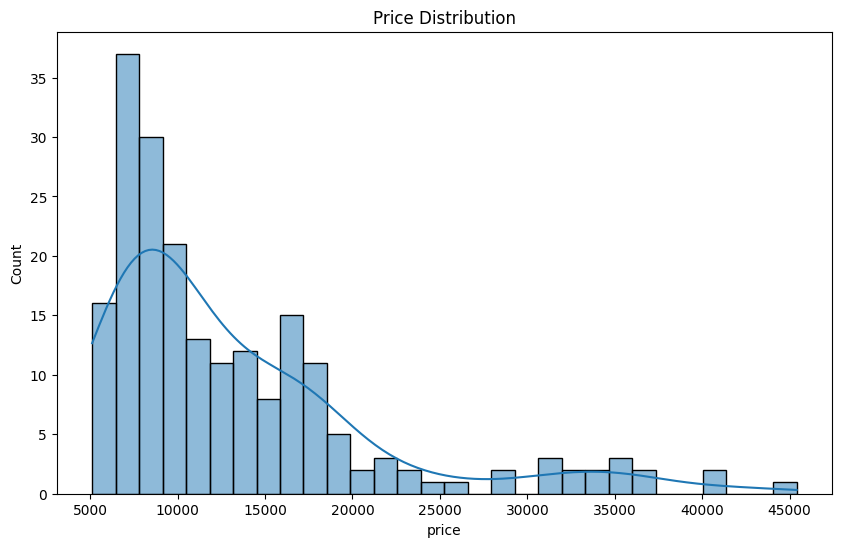

In [257]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()
# các loại xe có giá nằm lệch phải với mức giá chủ yếu từ 5000-20000 Usd

In [126]:
# mối liên hệ giữa thuộc tính định lượng với price -> scatterplot, lineplot, lmplot

In [127]:
# mối liên hệ giữa thuộc tính định tính với price -> bar chart
# group giá theo hãng xe, tính trung bình giá của từng hãng

##Thuộc tính định danh vs Price

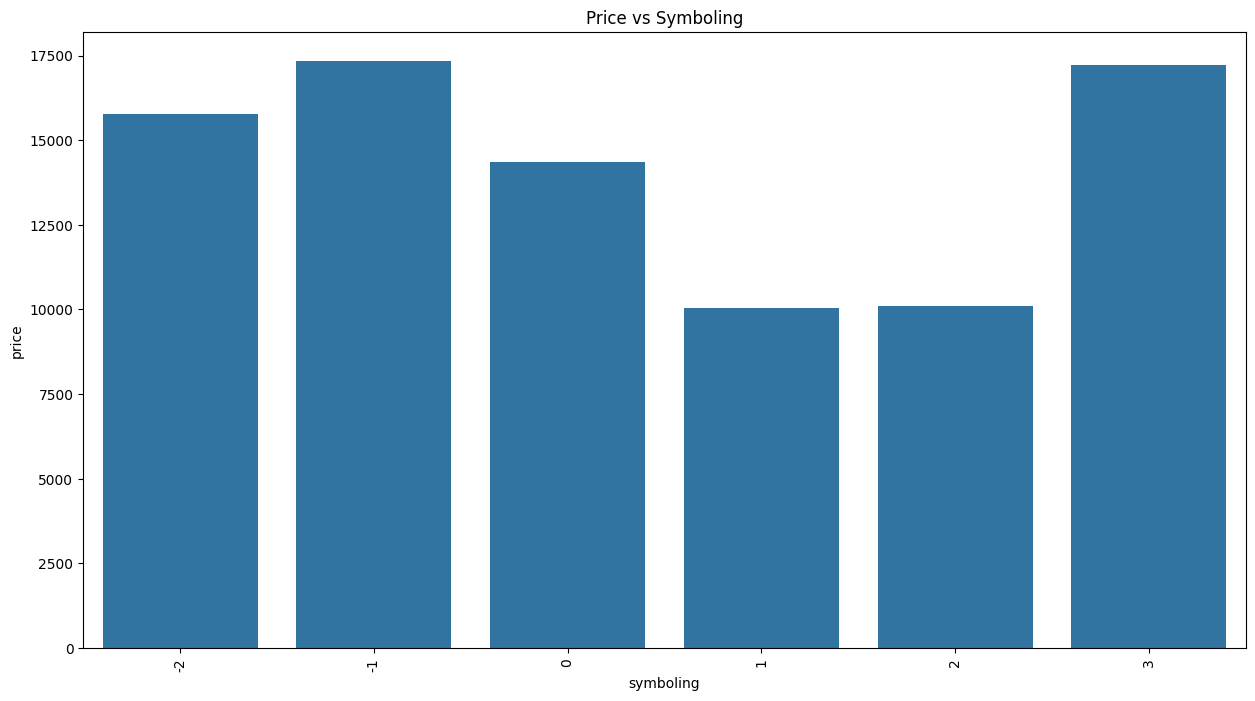

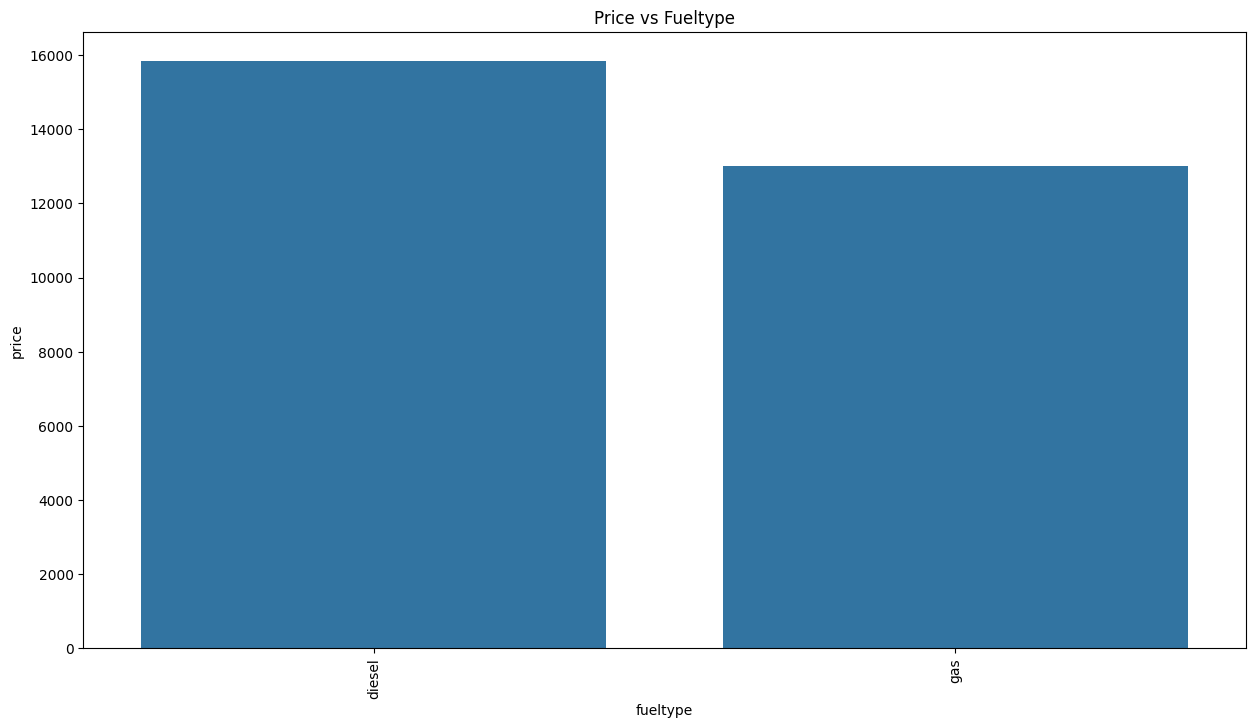

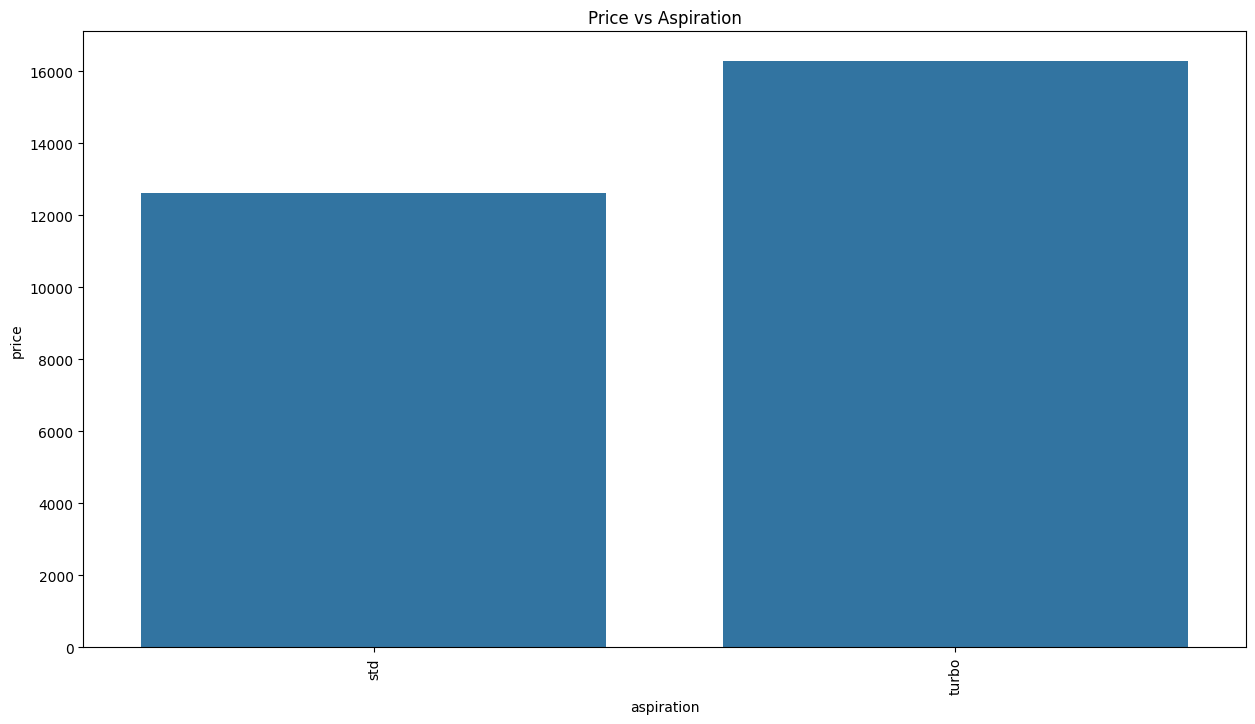

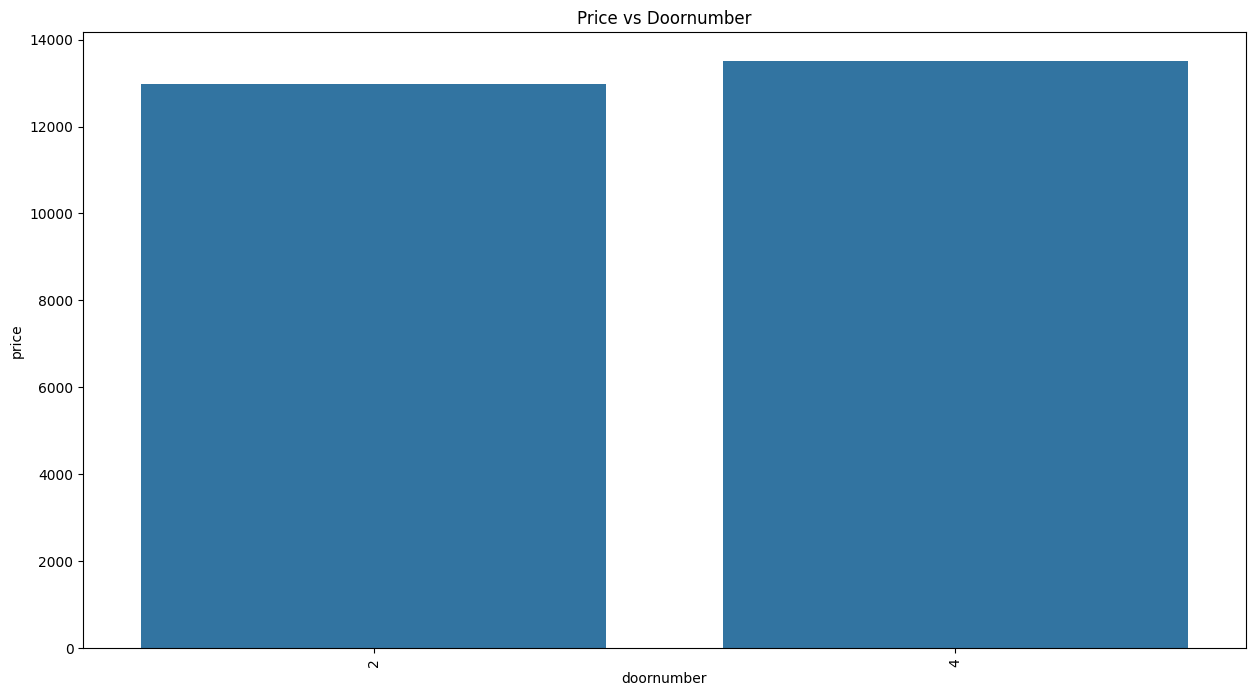

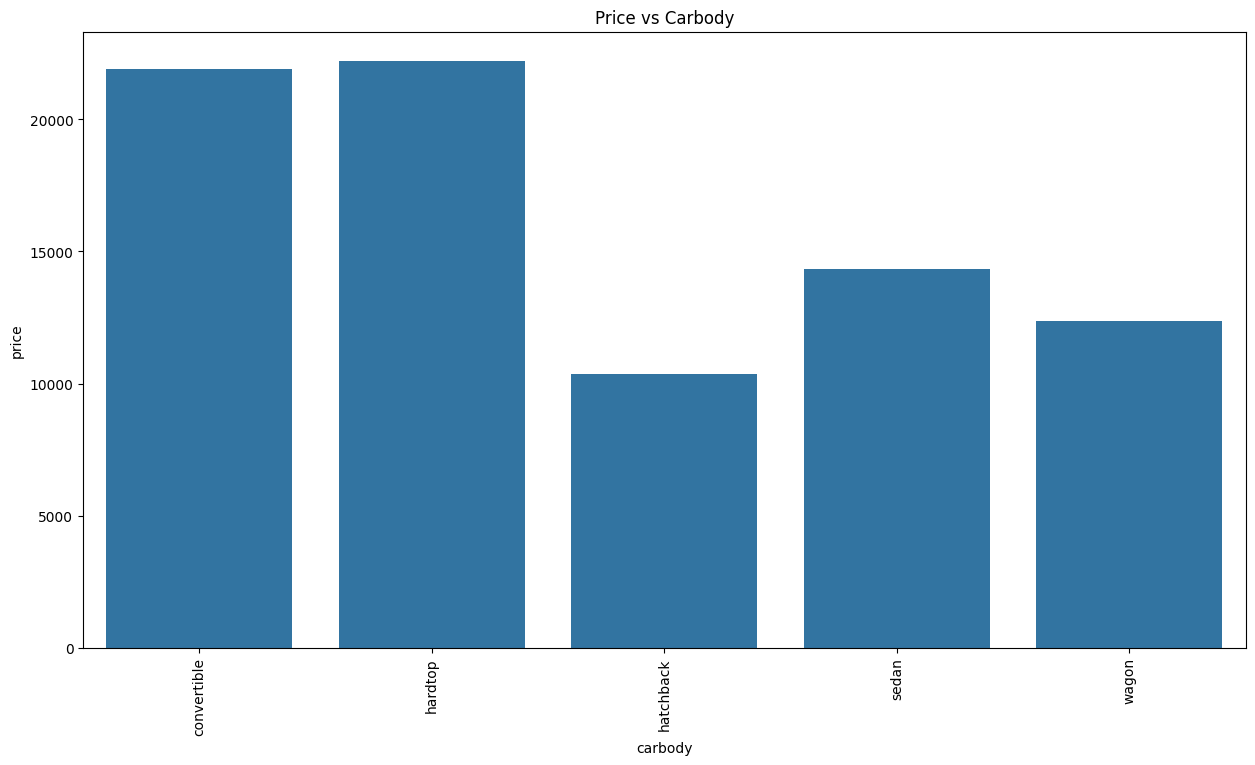

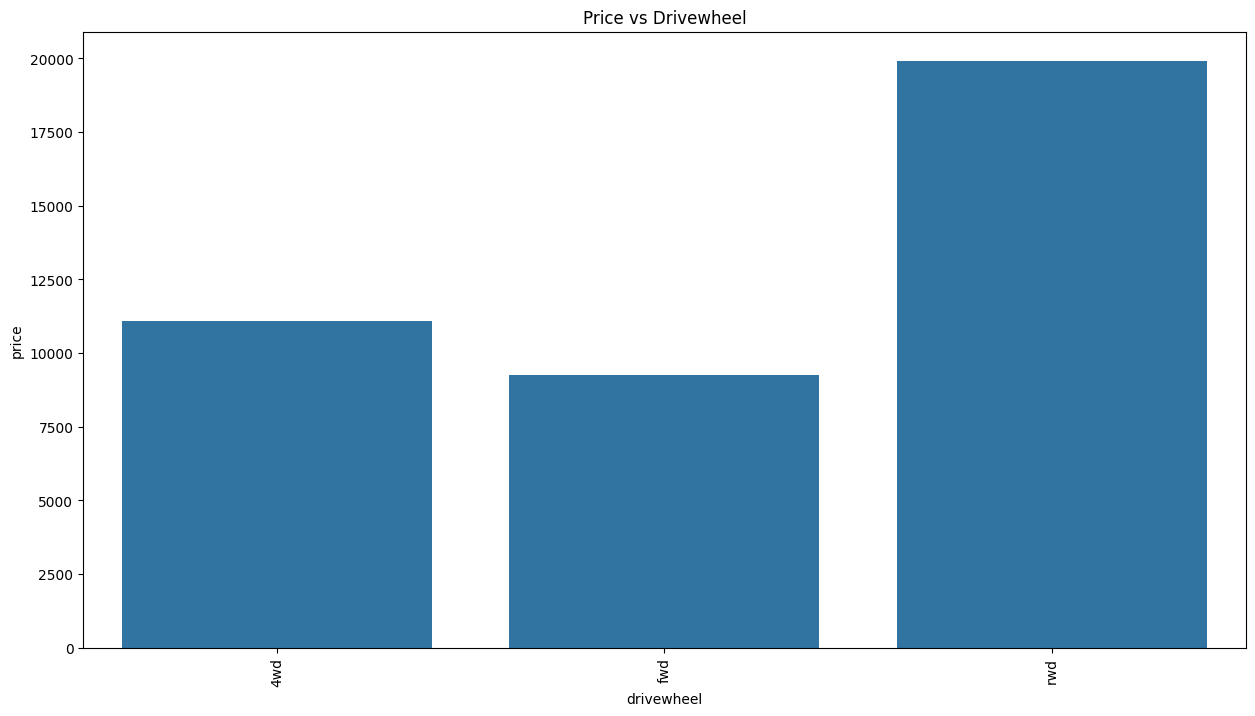

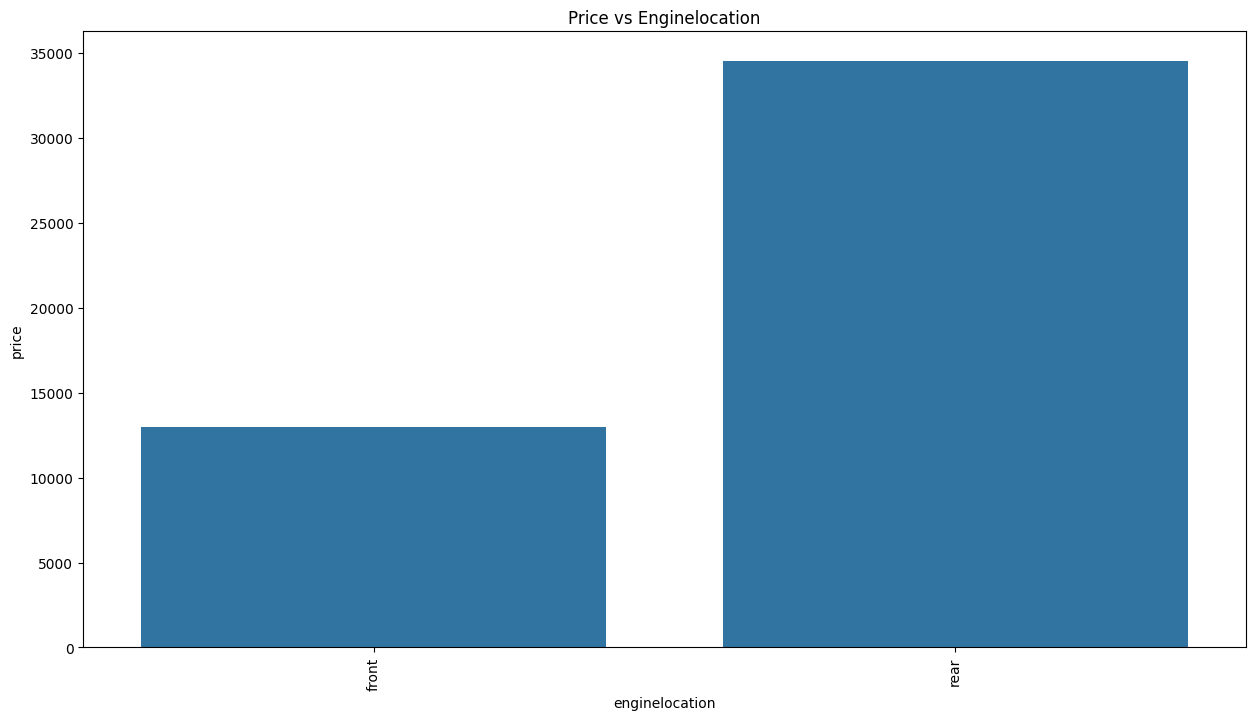

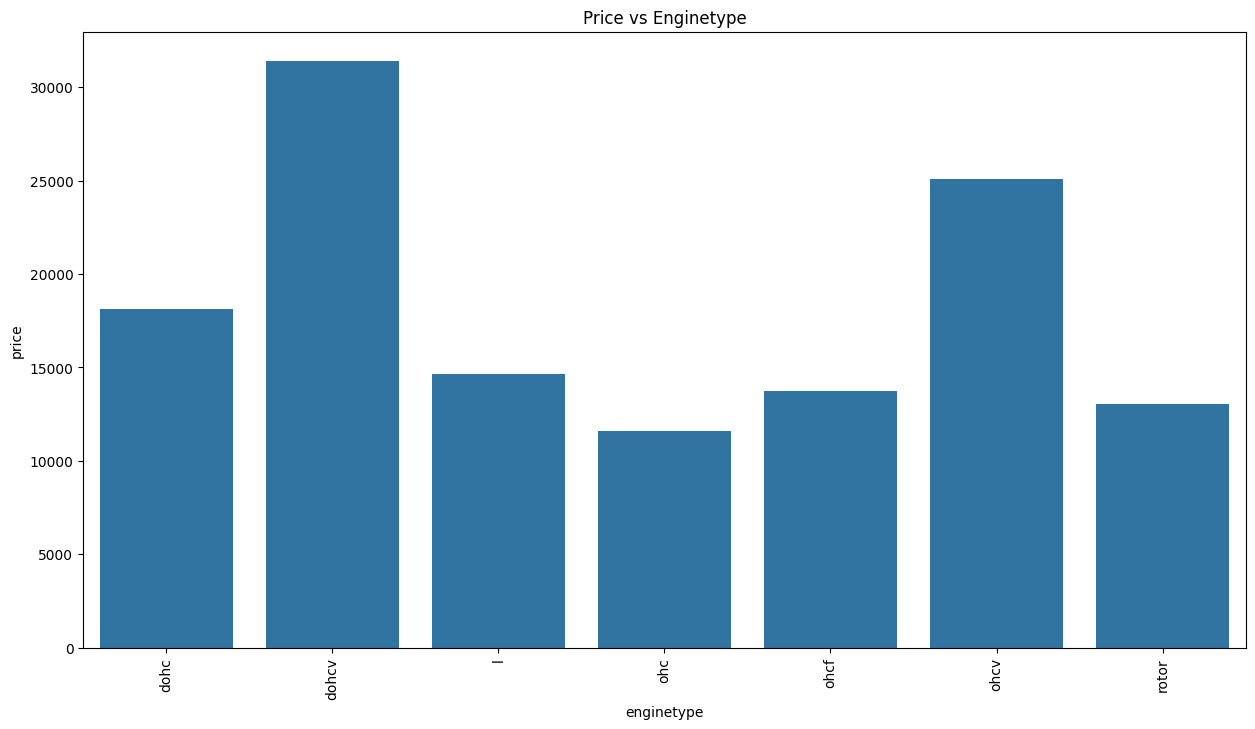

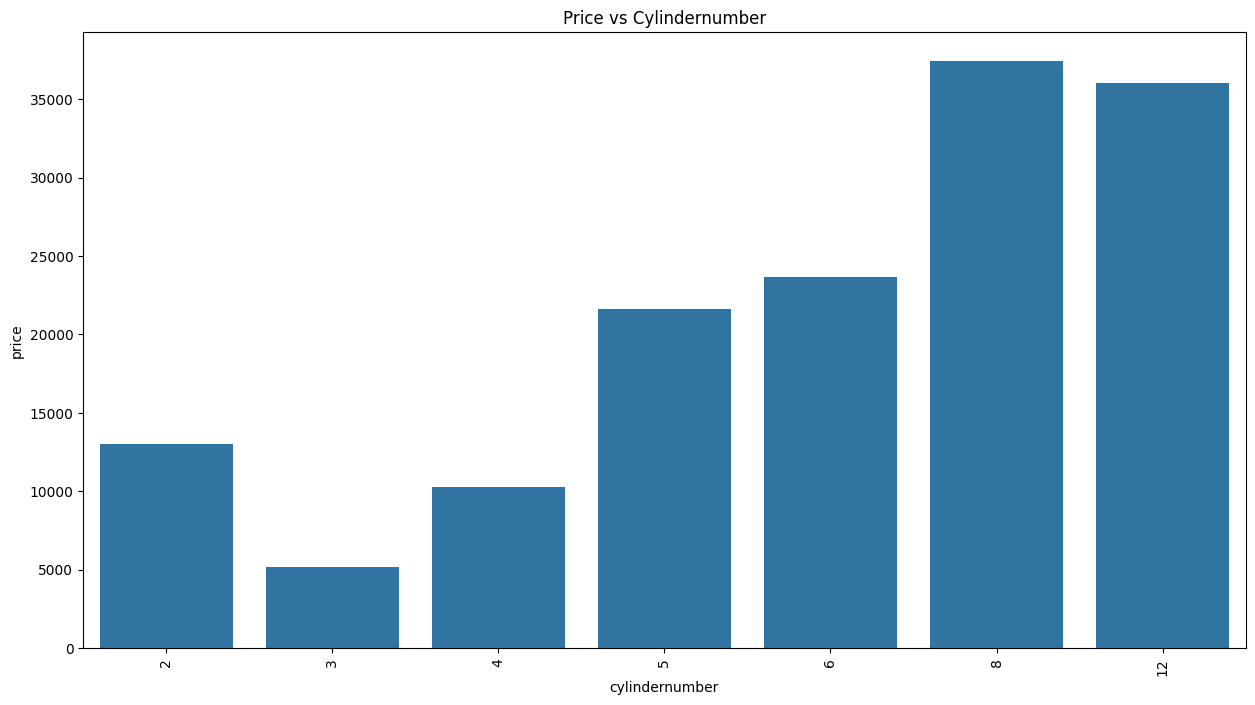

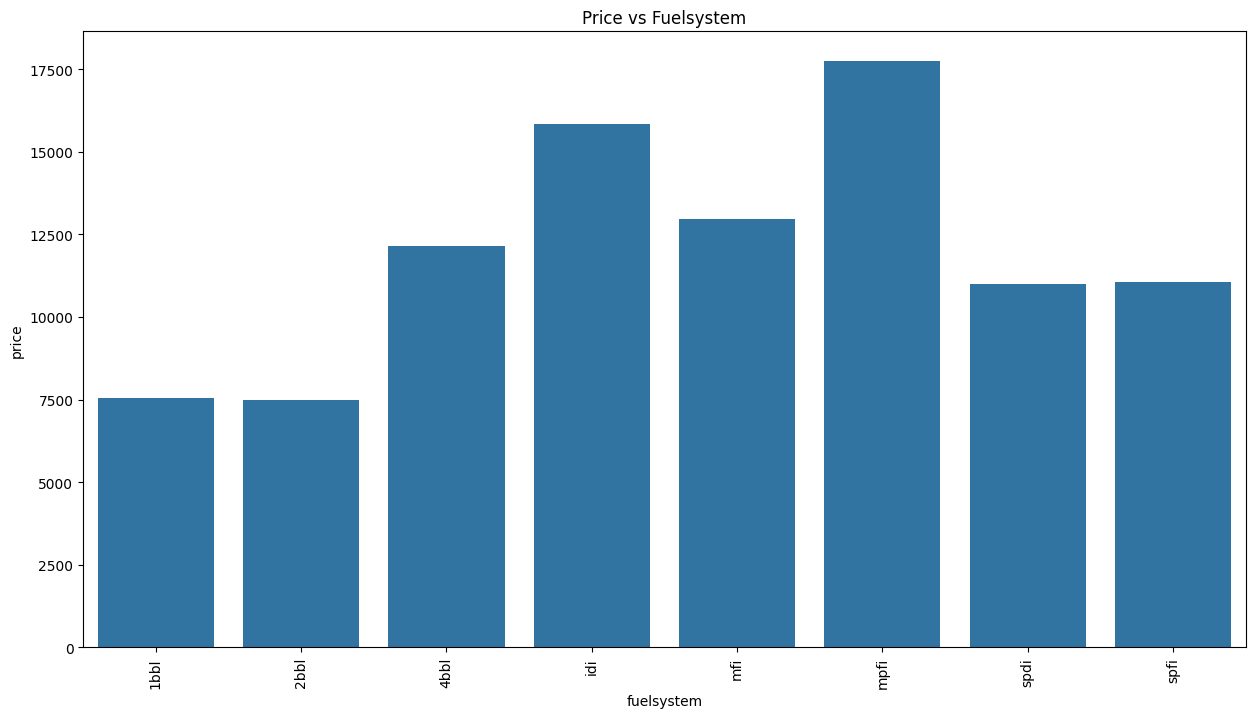

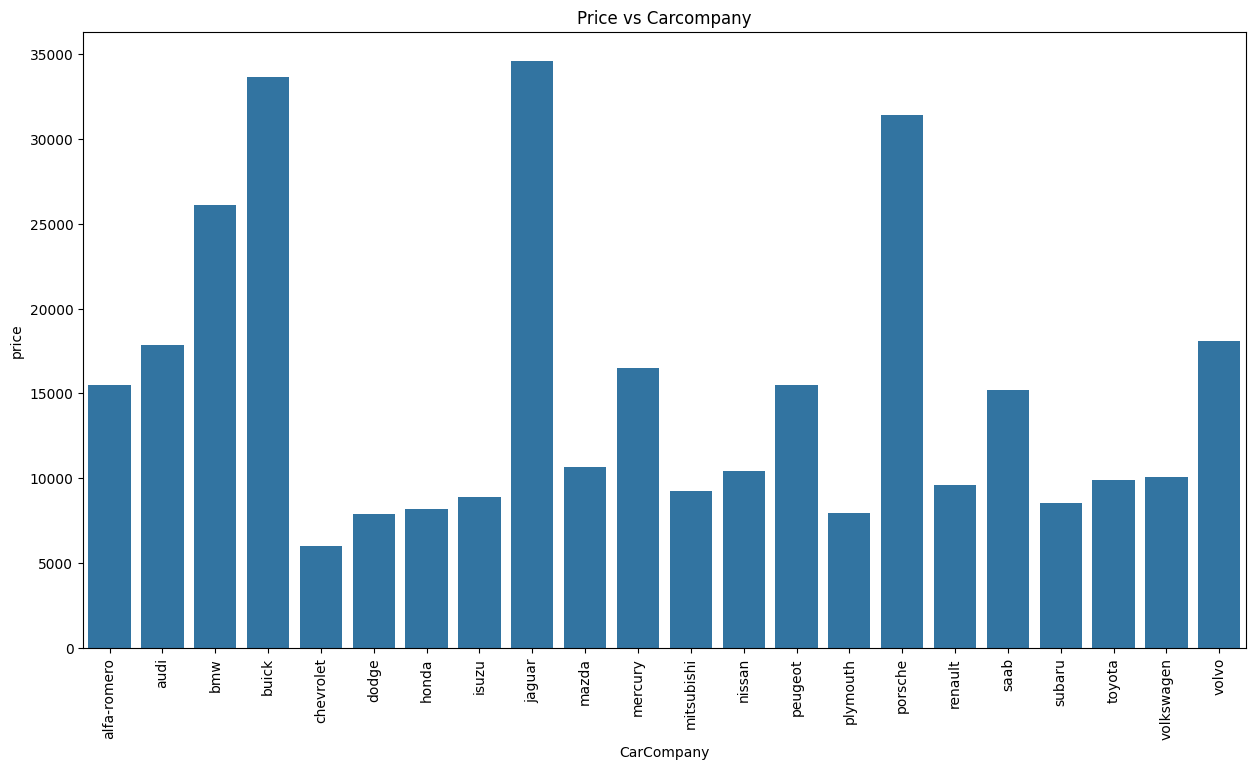

In [258]:
categorical_attributes = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
                          'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
                          'fuelsystem', 'CarCompany']

for attr in categorical_attributes:
    plt.figure(figsize=(15, 8))
    data=df.groupby(attr)['price'].mean().reset_index()
    sns.barplot(data,x=attr, y='price')
    plt.title(f'Price vs {attr.capitalize()}')
    plt.xticks(rotation=90)
    plt.show()

##Thuộc tính định lượng vs Price

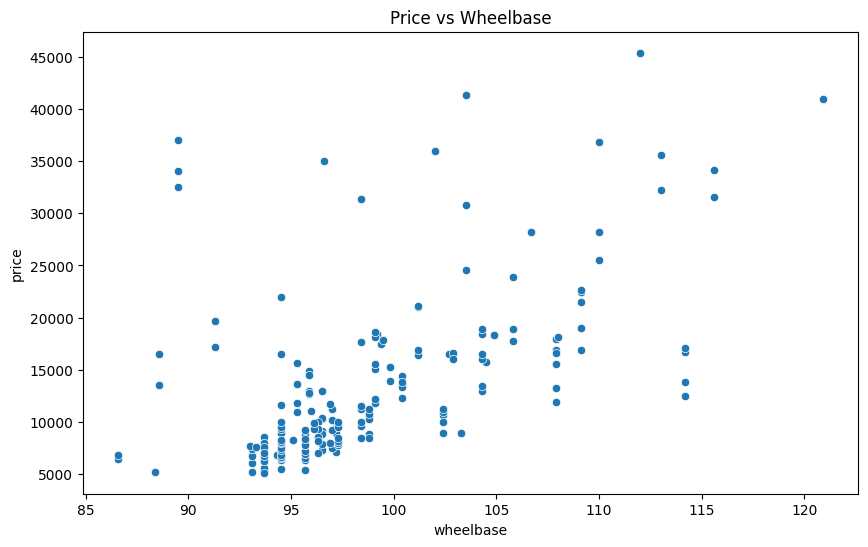

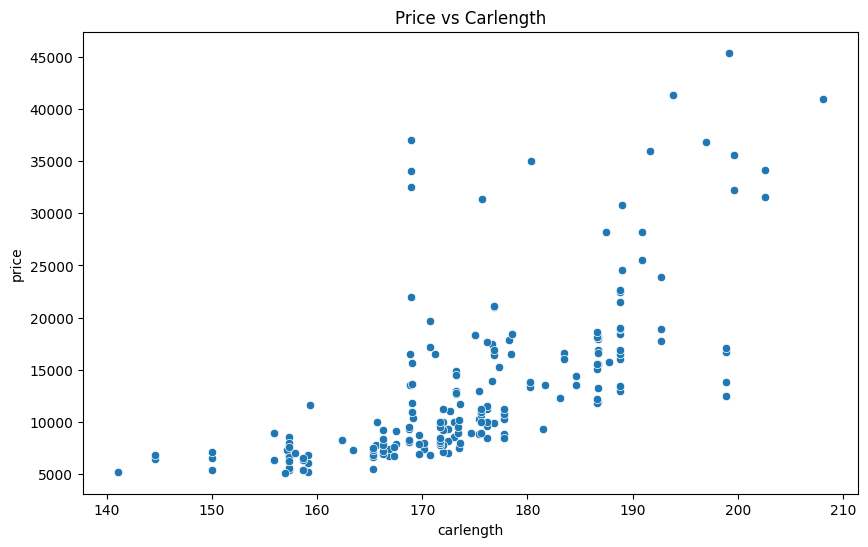

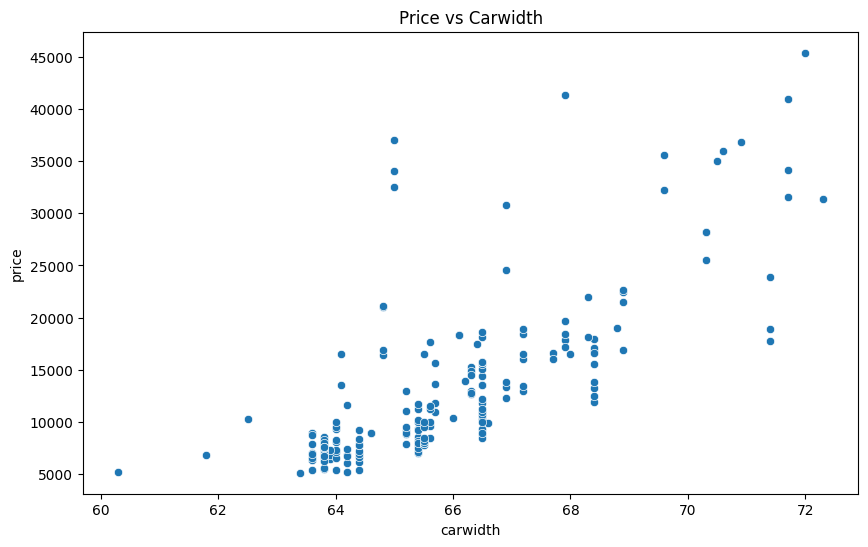

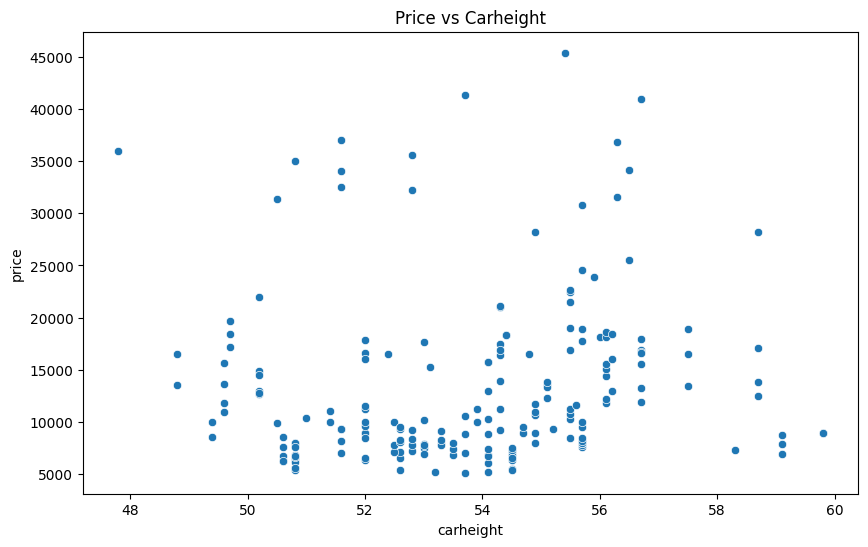

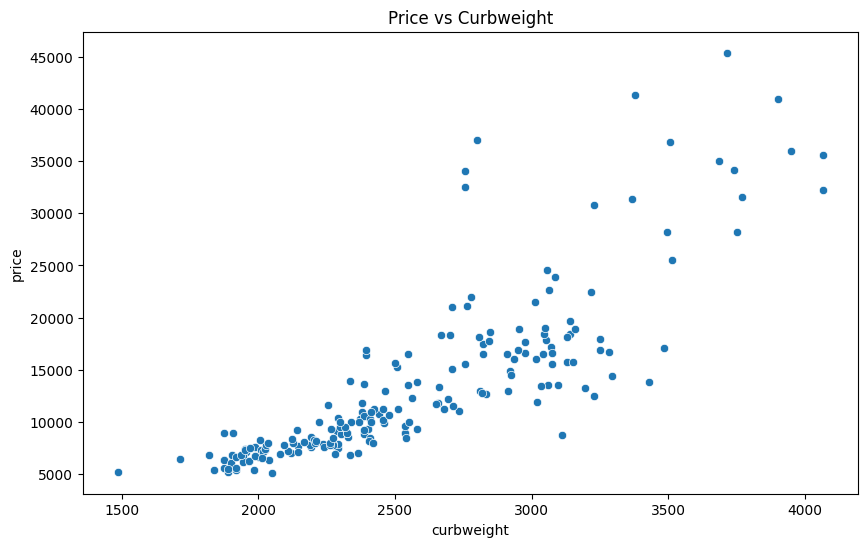

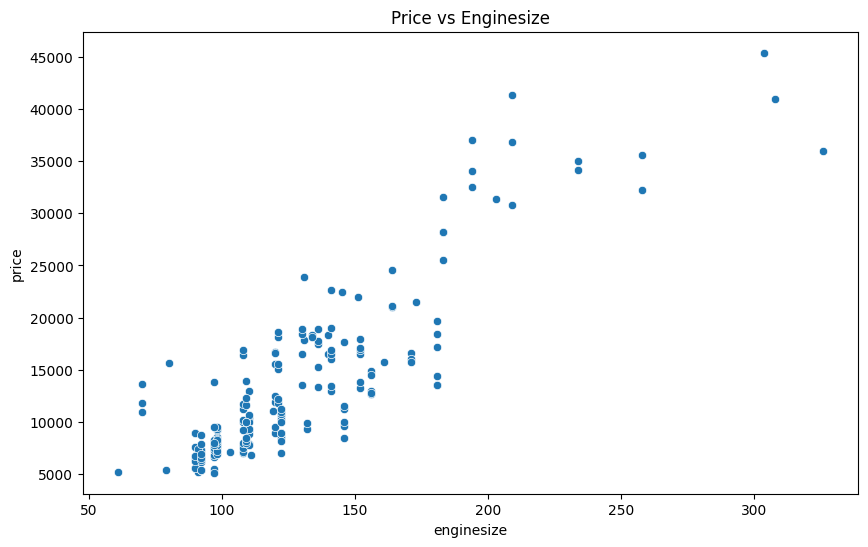

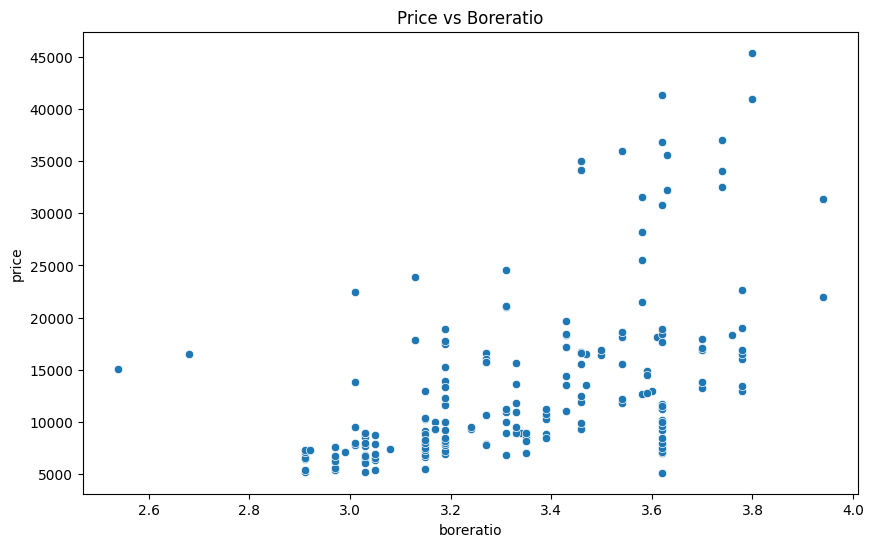

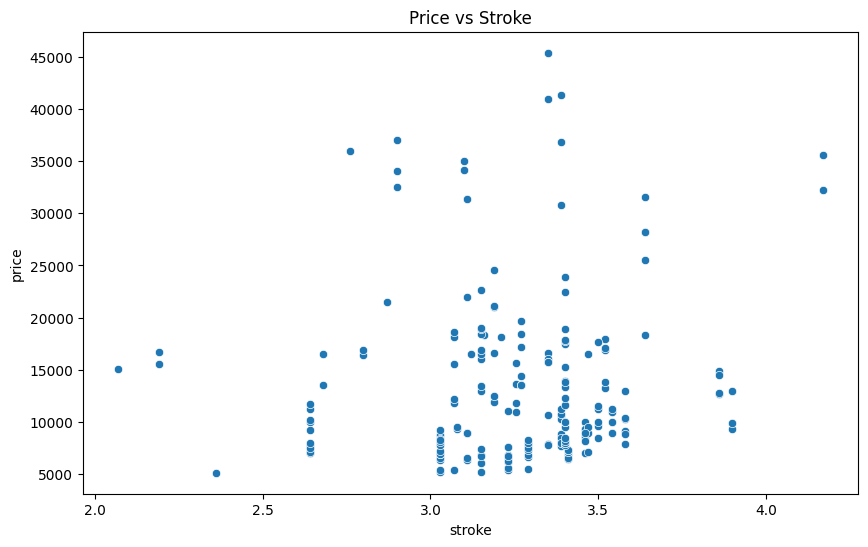

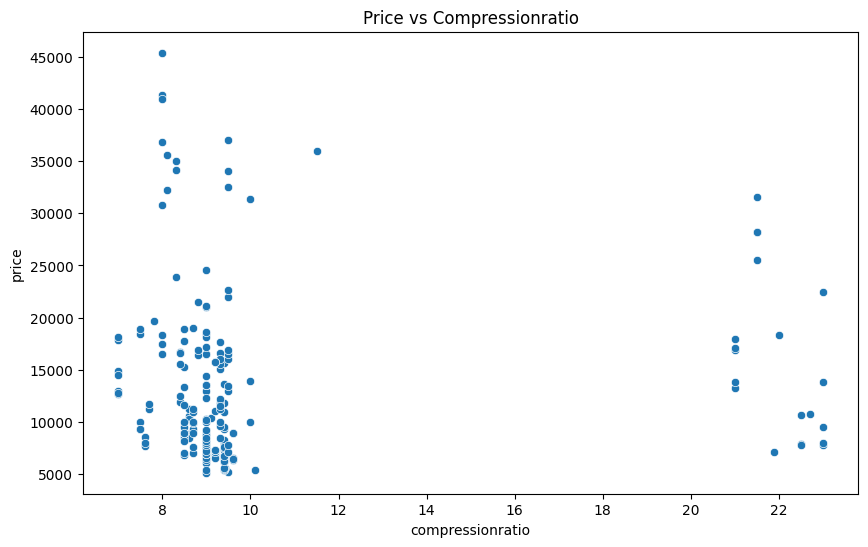

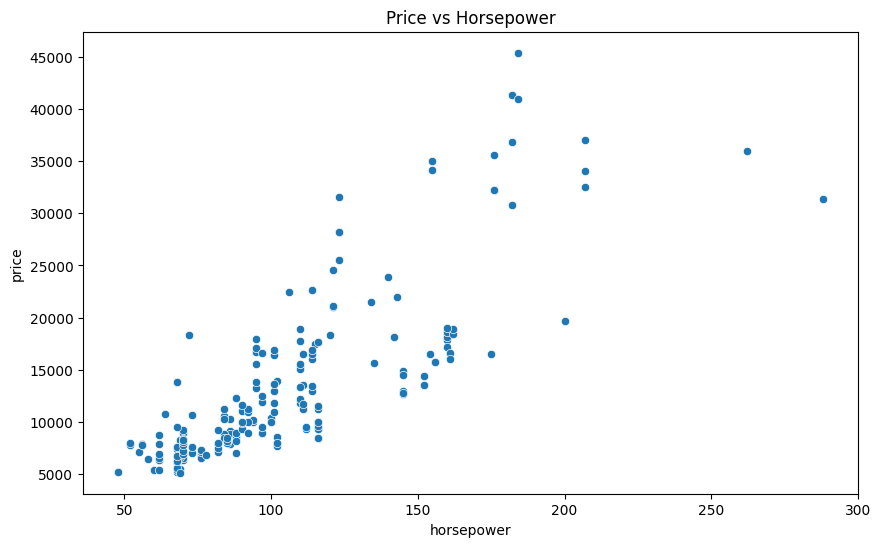

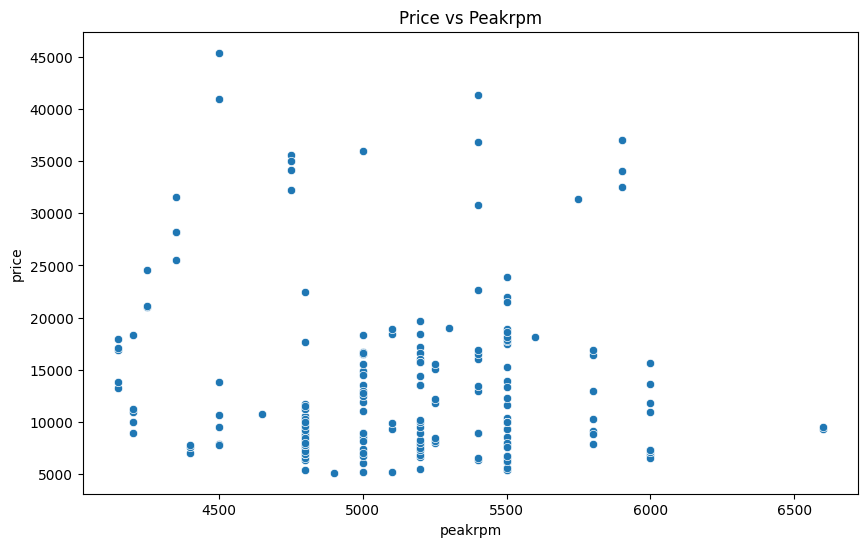

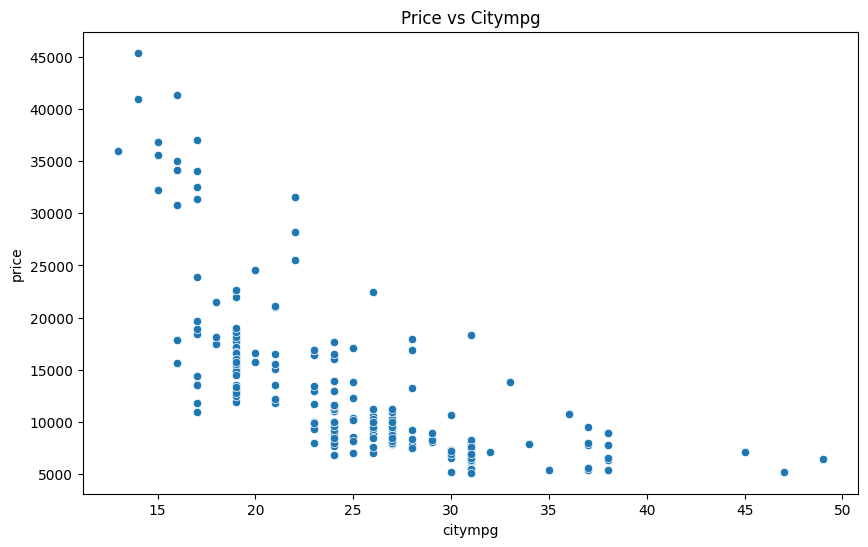

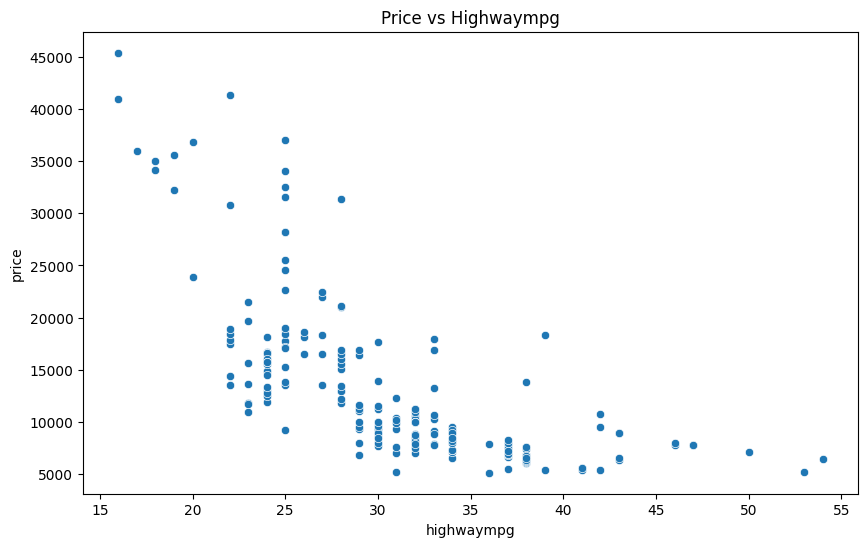

In [259]:
# Biểu đồ scatter plot cho thuộc tính định lượng
quantitative_attributes = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                           'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                           'peakrpm', 'citympg', 'highwaympg']

for attr in quantitative_attributes:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=attr, y='price', data=df)
    plt.title(f'Price vs {attr.capitalize()}')
    plt.show()

## Nhận xét các thuộc tính gây ảnh hưởng tới giá

### wheelbase

In [260]:
stats.pearsonr(df['wheelbase'], df['price'])


PearsonRResult(statistic=0.5778155982921501, pvalue=1.182820486337694e-19)

In [261]:
1.182820486337694e-19 <0.05

True

In [262]:
# p <0.05 ==> Bác bỏ H0 ==> wheelbase có tuong quan đến Price

### carlength

In [263]:
stats.pearsonr(df['carlength'], df['price'])

PearsonRResult(statistic=0.6829200156779621, pvalue=1.6787066240745445e-29)

In [264]:
1.6787066240745445e-29 < 0.05

True

In [265]:
# p <0.05 ==> Bác bỏ H0 ==> carlength có tuong quan đến Price

###carwidth

In [266]:
stats.pearsonr(df['carwidth'], df['price'])

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876118924e-40)

In [267]:
9.627437876118924e-40 < 0.05

True

In [268]:
# p <0.05 ==> Bác bỏ H0 ==> carwidth có tuong quan đến Price

###carheight

In [269]:
stats.pearsonr(df['carheight'], df['price'])

PearsonRResult(statistic=0.11933622657049445, pvalue=0.08832832352274969)

In [270]:
0.08832832352274969 < 0.05

False

In [271]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh carheight có gây ảnh hưởng tới Price

### curbweight

In [272]:
stats.pearsonr(df['curbweight'], df['price'])

PearsonRResult(statistic=0.8353048793372968, pvalue=1.2144448264030345e-54)

In [273]:
1.2144448264030345e-54 < 0.05

True

In [274]:
# p <0.05 ==> Bác bỏ H0 ==> curbweight có tuong quan đến Price

### enginesize

In [275]:
stats.pearsonr(df['enginesize'], df['price'])

PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598648963e-65)

In [276]:
1.3547637598648963e-65 < 0.05

True

In [277]:
# p <0.05 ==> Bác bỏ H0 ==> enginesize có tuong quan đến Price

### boreratio

In [278]:
stats.pearsonr(df['boreratio'], df['price'])

PearsonRResult(statistic=0.5531732367984437, pvalue=7.907922278248891e-18)

In [279]:
7.907922278248891e-18 < 0.05

True

In [280]:
# p < 0.05 ==> Bác bỏ H0 ==> boreratio có tương quan với nhau price

### stroke

In [281]:
stats.pearsonr(df['stroke'], df['price'])

PearsonRResult(statistic=0.079443083881931, pvalue=0.2575137159090866)

In [282]:
0.2575137159090866 < 0.05

False

In [283]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh stroke có gây ảnh hưởng tới Price

### Compressionratio

In [284]:
stats.pearsonr(df['compressionratio'], df['price'])

PearsonRResult(statistic=0.06798350579944264, pvalue=0.33277236122380593)

In [285]:
0.33277236122380593 < 0.05

False

In [286]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh compressionratio có gây ảnh hưởng tới Price

### horsepower

In [287]:
stats.pearsonr(df['horsepower'], df['price'])

PearsonRResult(statistic=0.8081388225362216, pvalue=1.4834365732940885e-48)

In [288]:
# p < 0.05 ==> Bác bỏ H0 ==> horsepower có tương quan với nhau price

### peakrpm

In [289]:
stats.pearsonr(df['peakrpm'], df['price'])

PearsonRResult(statistic=-0.08526715027785688, pvalue=0.22414123444666736)

In [290]:
# p > 0.05 ==> không đủ bằng chứng để bác bỏ H0 ==> không đủ bằng chứng chứng minh peakrpm có gây ảnh hưởng tới Price

### citympg

In [291]:
stats.pearsonr(df['citympg'], df['price'])

PearsonRResult(statistic=-0.6857513360270397, pvalue=7.978684249663508e-30)

In [292]:
# p < 0.05 ==> Bác bỏ H0 ==> citympg có tương quan với nhau price

###highwaympg

In [293]:
stats.pearsonr(df['highwaympg'], df['price'])

PearsonRResult(statistic=-0.6975990916465562, pvalue=3.230681380364674e-31)

In [294]:
# p < 0.05 ==> Bác bỏ H0 ==> highwaympgcó tương quan với nhau price

In [295]:
# các thuộc tính gây ảnh hưởng tơi giá là
# Thuộc tính định tính: 'carbody', 'drivewheel', 'enginelocation',
#                        'enginetype','CarCompany','cylindernumber','fuelsystem'(p-value << 0.05)

# Thuộc tính định lượng: 'carlength', 'carwidth', 'curbweight','wheelbase','boreratio;
#                         'enginesize','horsepower', 'citympg', 'highwaympg' trong đó
#                 citypmg, hightwaypmg la tương quan nghịch, con lại là tương quan thuận

## Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng

Xem xét có những biến nào có tương quan lớn với nhau, chỉ giữ lại 1 trong các biến đó đưa vào mô hình

In [296]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany'],
      dtype='object')

<Axes: >

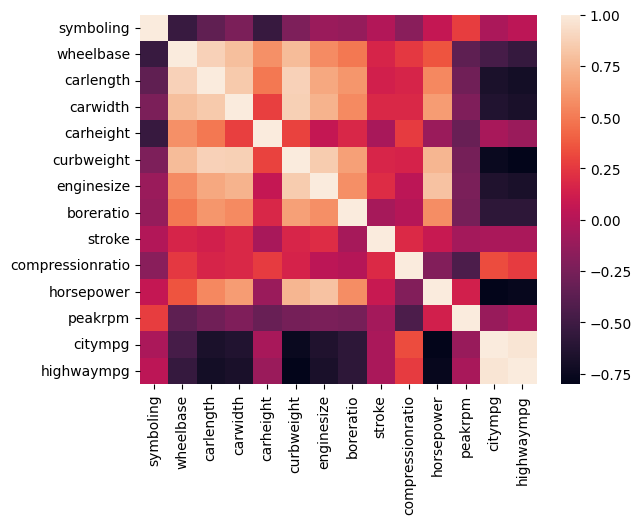

In [297]:
# tính tương quan
# heatmap
sns.heatmap(df[['symboling',
                'wheelbase',
                'carlength',
                'carwidth',
                'carheight',
                'curbweight',
                'enginesize',
                'boreratio',
                'stroke',
                'compressionratio',
                'horsepower',
                'peakrpm',
                'citympg',
                'highwaympg']].corr())

In [298]:
# tại sao những biến có tương quan lớn với nhau, nên bỏ 1, giữ 1 để đưa vào mô hình dự đoán price?
  # đỡ mất công thu thập, lưu trữ, xử lý, và giám sát dữ liệu
# nên bỏ biến nào và giữ biến nào?
  # giữ biến: tương quan cao hơn với giá
  # bỏ biến: ít tương quan với giá
# tương quan giữa các biến độc lập (biến dùng để dự đoán) => bỏ price (biến phụ thuộc)

In [299]:
test_heatmap = df[['symboling',
                'wheelbase',
                'carlength',
                'carwidth',
                'carheight',
                'curbweight',
                'enginesize',
                'boreratio',
                'stroke',
                'compressionratio',
                'horsepower',
                'peakrpm',
                'citympg',
                'highwaympg']].corr()

In [300]:
test_heatmap = test_heatmap[(test_heatmap > 0.8) & (test_heatmap < 1) | (test_heatmap < 0.8) & (test_heatmap < -0.75)]
test_heatmap

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,NaN,0.874587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carlength,NaN,0.874587,NaN,0.841118,NaN,0.877728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carwidth,NaN,NaN,0.841118,NaN,NaN,0.867032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carheight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,NaN,0.877728,0.867032,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,NaN,-0.757414,-0.797465
enginesize,NaN,NaN,NaN,NaN,NaN,0.850594,NaN,NaN,NaN,NaN,0.809769,NaN,NaN,NaN
boreratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compressionratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## car length , car weight và curbweight tương quan nhau

In [301]:
x = df[['carwidth','carlength','curbweight']]
y = df['price']

In [302]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [303]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.05e-42
Time:                        15:21:44   Log-Likelihood:                -1613.2
No. Observations:                 164   AIC:                             3234.
Df Residuals:                     160   BIC:                             3247.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.984e+04   1.79e+04     -2.780      0.006   -8.52e+04   -1.44e+04
carwidth     961.6662    339.680      2.831      0.005     290.832    1632.500
carlength   -200.8485     65.230     -3.079      0.002    -329.671     -72.026
curbweight    13.6198      1.612      8.451      0.000      10.437      16.802
==============================================================================
Omnibus:                       77.813   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.700
Skew:                           1.806   Prob(JB):                     1.70e-69
Kurtosis:                       8.771   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
x = df[['curbweight']]
y = df['price']

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [306]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     343.7
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.81e-42
Time:                        15:21:44   Log-Likelihood:                -1619.5
No. Observations:                 164   AIC:                             3243.
Df Residuals:                     162   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.009e+04   1870.129    -10.744      0.000   -2.38e+04   -1.64e+04
curbweight    13.0934      0.706     18.540      0.000      11.699      14.488
==============================================================================
Omnibus:                       64.668   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.065
Skew:                           1.514   Prob(JB):                     4.94e-50
Kurtosis:                       7.905   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [307]:
# giữ ccurbweight và bỏ hai cái còn lại

## Carlength và Wheelbase

In [308]:
x = df[['wheelbase','carlength']]
y = df['price']

In [309]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [310]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     69.53
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.71e-22
Time:                        15:21:44   Log-Likelihood:                -1661.8
No. Observations:                 164   AIC:                             3330.
Df Residuals:                     161   BIC:                             3339.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.157e+04   7824.324     -7.869      0.000    -7.7e+04   -4.61e+04
wheelbase   -224.7131    163.714     -1.373      0.172    -548.017      98.591
carlength    558.4561     81.603      6.844      0.000     397.305     719.607
==============================================================================
Omnibus:                       62.731   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.950
Skew:                           1.680   Prob(JB):                     4.53e-33
Kurtosis:                       6.242   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [311]:
# Giữ carlength bỏ wheelbase

## Curbweight và Enginesize tương quan nhau

In [312]:
x = df[['curbweight','enginesize']]
y = df['price']

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [314]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     293.4
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.02e-54
Time:                        15:21:44   Log-Likelihood:                -1586.9
No. Observations:                 164   AIC:                             3180.
Df Residuals:                     161   BIC:                             3189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.424e+04   1673.680     -8.506      0.000   -1.75e+04   -1.09e+04
curbweight     4.9911      1.083      4.609      0.000       2.852       7.130
enginesize   117.1137     13.212      8.864      0.000      91.023     143.205
==============================================================================
Omnibus:                       26.426   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.884
Skew:                           0.797   Prob(JB):                     1.09e-10
Kurtosis:                       5.044   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
# Giữ enginesize và bỏ curbweight

## Curbweight và Horsepower

In [316]:
x = df[['curbweight','horsepower']]
y = df['price']

In [317]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [318]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     265.6
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.02e-51
Time:                        15:21:44   Log-Likelihood:                -1593.3
No. Observations:                 164   AIC:                             3193.
Df Residuals:                     161   BIC:                             3202.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.641e+04   1666.767     -9.846      0.000   -1.97e+04   -1.31e+04
curbweight     8.0429      0.886      9.082      0.000       6.294       9.792
horsepower    88.4243     11.345      7.794      0.000      66.020     110.828
==============================================================================
Omnibus:                       27.736   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.161
Skew:                           0.834   Prob(JB):                     3.48e-11
Kurtosis:                       5.065   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [319]:
# giữ horsepower

Enginesize VÀ horsepowwer

In [320]:
x = df[['enginesize','horsepower']]
y = df['price']

In [321]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [322]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     299.3
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           5.75e-55
Time:                        15:21:44   Log-Likelihood:                -1585.7
No. Observations:                 164   AIC:                             3177.
Df Residuals:                     161   BIC:                             3187.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8392.8482    964.054     -8.706      0.000   -1.03e+04   -6489.026
enginesize   121.8356     11.823     10.305      0.000      98.488     145.183
horsepower    60.9564     12.414      4.910      0.000      36.440      85.473
==============================================================================
Omnibus:                        6.375   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.912
Skew:                           0.248   Prob(JB):                       0.0191
Kurtosis:                       3.954   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
# Giữ enginesize và bỏ horsepower

highwaympg và city mpg

In [324]:
x = df[['highwaympg','citympg']]
y = df['price']

In [325]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [326]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     78.04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.02e-24
Time:                        15:21:45   Log-Likelihood:                -1657.3
No. Observations:                 164   AIC:                             3321.
Df Residuals:                     161   BIC:                             3330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.955e+04   2344.548     16.868      0.000    3.49e+04    4.42e+04
highwaympg  -943.5843    301.082     -3.134      0.002   -1538.163    -349.006
citympg      122.5037    314.635      0.389      0.698    -498.841     743.848
==============================================================================
Omnibus:                       43.843   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.597
Skew:                           1.403   Prob(JB):                     4.68e-16
Kurtosis:                       4.568   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
# Giữ highwaympg và loại citympg

Tong ket

In [328]:
# Còn lại so biến là enginesize và highwaympg

In [329]:
x = df[['enginesize','highwaympg']]
y = df['price']

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [331]:
X2 = sm.add_constant(x_train)
model_stats = sm.OLS(y_train, X2)
results = model_stats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     281.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.99e-53
Time:                        15:21:45   Log-Likelihood:                -1589.7
No. Observations:                 164   AIC:                             3185.
Df Residuals:                     161   BIC:                             3195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2648.3101   2885.167      0.918      0.360   -3049.341    8345.961
enginesize   142.0832      9.885     14.373      0.000     122.562     161.605
highwaympg  -235.5437     60.328     -3.904      0.000    -354.681    -116.407
==============================================================================
Omnibus:                       13.051   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.128
Skew:                           0.531   Prob(JB):                     0.000315
Kurtosis:                       4.110   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
# R-squared = 0.777 ==> haui thuộc tính trên có thể thể hiện được 77,7% sự thay dổi của price

## Tiến hành mã hóa tạo ra các biến dummy từ các biến category (thang đo nominal) ban đầu

In [333]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany'],
      dtype='object')

In [334]:
df_category = df[[ 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype',
       'fuelsystem', 'CarCompany']]

In [335]:
df1 = pd.get_dummies(df.drop(['price','symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg','car_ID','doornumber'], axis=1),
                     columns=['CarName','fueltype','aspiration',
                              'carbody','drivewheel','enginelocation',
                              'enginetype','fuelsystem','CarCompany'],
                     dtype='int')

In [336]:
df1.head()

,cylindernumber,enginesize,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,...,CarCompany_nissan,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo
0,4,130,27,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,130,27,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,152,26,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,109,30,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,136,22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn


In [337]:
x = df1
y = df['price']

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# để random_state = 1

In [356]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [358]:
coef = model.coef_
intercept = model.intercept_

In [359]:
coef

array([-3.10672629e+03,  1.14208889e+02, -8.65384583e+01, -4.16257124e+02,
        4.85429069e+02, -3.27399113e+03, -2.68991129e+02, -2.83525382e+03,
        5.15140169e+02,  5.73281454e+03,  2.42780531e+03, -2.03815387e+02,
       -1.94485983e+03, -4.41350961e+03, -1.42293275e+02,  4.96435288e+03,
        3.98907596e+03, -1.59161573e-11,  3.19309135e+03,  4.00463485e+03,
       -3.32321121e+02, -2.55413243e+03,  7.04289960e-11, -7.05597714e+02,
        7.45432424e+03,  2.31701374e+03,  9.11470109e+02, -9.82254278e-11,
       -3.64700465e+02, -9.62798397e+02,  1.29214597e+02,  4.83116665e+02,
       -4.33883335e+02, -6.86668500e-11, -6.36646291e-11, -1.91559871e+03,
       -2.09183781e-11, -1.87854032e+01, -4.16170028e+02, -1.14797208e+03,
        6.36646291e-12, -4.59294824e-11,  9.92222578e+02, -4.15005308e+02,
        1.36424205e-11,  2.18893593e+02,  3.63797881e-12, -1.07607001e+03,
        3.25344020e+02,  1.88477456e+03, -4.04369040e+03, -7.59117648e+02,
       -2.63753464e-11,  

In [360]:
intercept

21379.67916353396

In [237]:
# Tách dữ liệu: Train (70-80%) và Test (20-30%)

In [238]:
# Xây mô hình

In [239]:
# Đánh giá kết quả mô hình -> test
# Mean Absolute Error -> phổ biến
# Mean Square Error -> lựa chọn cho bài toán
# Root Mean Square Error

In [361]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)
y_pred


array([ 3104.20027206,  5212.59198084,  6224.06794284,  7357.06945729,
        8773.09793186, 29282.98626427,  1000.6487515 ,  7096.8816137 ,
        6426.20820633, 10754.70631585, 18941.58714601, 13939.00435152,
       17908.79546039,  9042.97208277, 15615.83667007,  9572.45105845,
       10877.91562424,  6900.67361832, 20523.80413629, 12298.13577878,
       11476.41406402,  6554.51978521, 16430.        ,  8771.00651937,
       13017.75431221,  6900.67361832, 15495.62958231,  6958.38337499,
        5831.61537483,  7778.77155017,  8880.61292035, 10770.21031314,
       26770.92404022, 12500.72824508, 16680.04164348,  6958.38337499,
       10750.69664226, 36309.11764785, 15219.76840585, 19416.68240672,
        5078.14274487])

In [362]:
mean_absolute_error(y_test, y_pred)

1985.9589663355714

In [363]:
mean_squared_error(y_test, y_pred)

10004898.619069606

In [364]:
np.sqrt(mean_squared_error(y_test, y_pred))

3163.052105019708

In [365]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [242]:
MAE = 100

## Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection.

## Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS


## Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.